<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 2 Solution - CSP <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi 

____

# Q1- CSP (50 Points)

In this question, we are going to plan for some future events in the country. There are some halls that can host different kinds of events, such as concerts, sports events, etc.

Two halls are considered adjacent if the distance between them is less than a threshold. Two adjacent halls cannot host the same event.

With these constraints, complete the code below and assign an event to each hall to satisfy every constraint.



## Example
Look at this example carefully:<br>
<img src="Images/CSP_example.png" width="500"/>
  - There are $6$ halls and $3$ kinds of events.
  - The halls in which each event can be held (for example, sport events can be held only at hall 1, 4 and 6).
  - Adjacent halls (we show adjacent halls here with a line between them) cannot host the same event (for example, halls 1 and 2 both cannot host concert events).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of event kinds).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th event (separated by space).
  - In the next line, $E$, the total number of adjacent constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given.
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (sport=1, concert=2, fashion=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=sport, Hall2=concert , Hall3=fashion, Hall4=sport, Hall5=concert, Hall6=concert}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for fashion, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells)

In [122]:
# Mana Abbaszadeh - 400109638
# Auxiliary functions

def check(assignment, value, variable, csp_constraints):
    for i in range(len(csp_constraints)):
        curr_hall = csp_constraints[i]
        for other_hall in curr_hall:
            if (assignment[i] == value) and (variable == other_hall):
                return False
    return True

def has_constraint(the_other_hall, hall1_event):
    for second_event in the_other_hall:
        if hall1_event != second_event:
            return True
    return False

def my_list_is_not_empty(my_list):
    if len(my_list) == 0:
        return False
    return True

def set_variable(csp_domains, assignment_length, assignment):
    ind = -1
    max_value = 100
    for i in range(assignment_length):
        if assignment[i] == 0:
            num_of_current_vals = len(csp_domains[i])
            if num_of_current_vals == 0:
                return -1
            elif max_value > num_of_current_vals:
                ind = i
                max_value = num_of_current_vals
    return ind + 1

def sort_the_list(csp_domains, csp_constraints, variable, assignment):
    if variable == -1:
        return []
    
    number_of_constraints = 0
    constraints = []

    for event in csp_domains[variable-1]:
        for hall in csp_constraints[variable-1]:
            if assignment[hall-1] == event:
                number_of_constraints = 100 + number_of_constraints
                break
            elif csp_domains[hall-1].__contains__(event):
                number_of_constraints += 1
        constraints.append((event, number_of_constraints))

        number_of_constraints = 0

    sort = sorted(constraints, key=lambda i: i[1])
    result = [x for x, y in sort]
    return result

In [123]:
def ac_3(csp_domains, csp_constraints):
    def revise(csp_constrints, csp_domains, h1, h2):
        if not (csp_constraints[h1-1].__contains__(h2)):
            return False
        is_removed = False
        for hall1_event in csp_domains[h1-1]:
            if not has_constraint(csp_domains[hall2 - 1], hall1_event):
                csp_domains[hall1 - 1].remove(hall1_event)
                is_removed = True
        return is_removed

    

    my_list = []
    n = len(csp_domains)
    for i in range(n + 1):
        i += 1
        for j in range(i + 1, n + 1):
            my_list.append((i, j))
        i -= 1
    
    while my_list_is_not_empty(my_list):
        hall1, hall2 = my_list.pop()
        if revise(csp_constraints, csp_domains, hall1, hall2):
            hall_constraint = csp_constraints[hall1 - 1]
            for hall in hall_constraint:
                my_list.append((hall, hall1))

In [124]:
def backtrack(csp_domains, csp_constraints, assignment):
    finished = 0
    for element in assignment:
        if element == 0:
            finished += 1
            break
    if finished == 0:
        return True, assignment
    #######################################
    variable = set_variable(csp_domains, len(assignment), assignment)
    for element in sort_the_list(csp_domains, csp_constraints, variable, assignment):
        if check(assignment, element, variable, csp_constraints):
            assignment[variable-1] = element
            success, result = backtrack(csp_domains, csp_constraints, assignment)

            if success:
                return True, result
            
            assignment[variable-1] = 0

    return False, assignment

def backtracking_search(csp_domains, csp_constraints):
    ac_3(csp_domains, csp_constraints)

    number_of_assignments = len(csp_domains)
    assignment = [0 for i in range(number_of_assignments)]
    success, result = backtrack(csp_domains, csp_constraints, assignment)
    
    if success:
        return ' '.join(str(val) for val in result)
    return 'NO'


test 1 is completed
assignment: 1 2 3 1 2 1


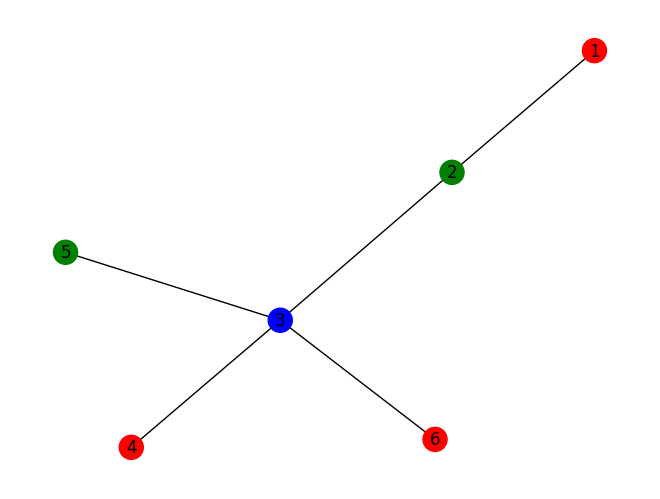

----------------------------------------------------------
test 2 is completed
assignment: 1 2 3 4 5


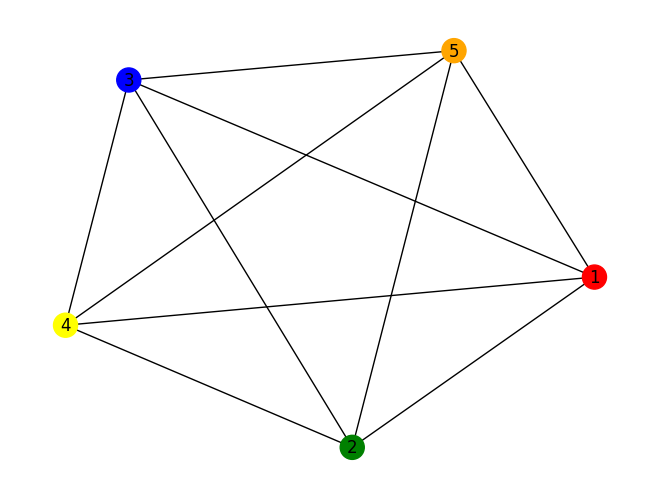

----------------------------------------------------------
test 3 is completed
assignment: NO
----------------------------------------------------------
test 4 is completed
assignment: 2 3 2 1 2 1


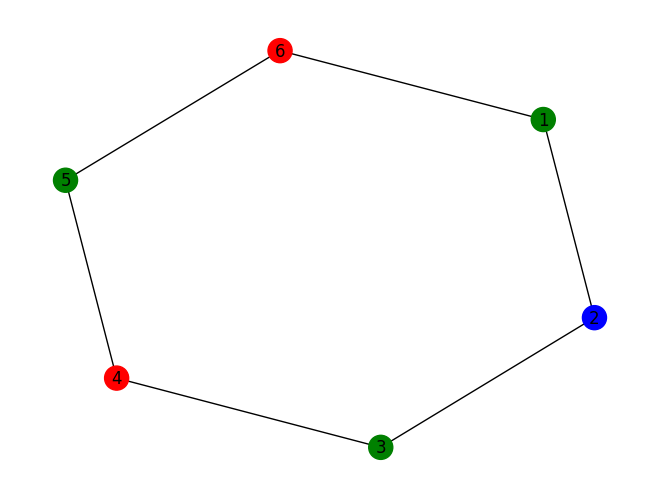

----------------------------------------------------------
test 5 is completed
assignment: 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1
Too many colors to plot for test 5
----------------------------------------------------------
Score = 100.0%


In [125]:
import Helper_codes.csp_helper as csp
import time
import networkx as nx
import matplotlib.pyplot as plt


def plot_test_case(result, n, next_e_lines, test_num):   # Do not change this function. This is for plotting the assignment. 
    if result == 'NO':
        return
    reult_list = result.split()
    reult_list = list(map(int, reult_list))
    if len(reult_list) >= 15:
        print(f'Too many colors to plot for test {test_num + 1}')
        return

    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    for edge in next_e_lines:
        G.add_edge(edge[0], edge[1])
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black', 'cyan', 'magenta', 'olive', 'teal']
    
    color_map = []
    for i in range(1, n + 1):
        color_map.append(colors[reult_list[i - 1] - 1])
          
    nx.draw(G, node_color=color_map, with_labels=True)
    plt.show()
 

TIME_LIMIT = 3

tests = csp.get_all_tests(prefix='csp_')
tests_passed = 0
for test_num, test in enumerate(tests):
    n, m, m_next_lines, e, next_e_lines = csp.scan_test_input(test)
    # **************************************************************************** #
    # Creating csp_domains -> events of each hall
    csp_domains = [list() for i in range(n)]
    for i in range(m):
        preferred_halls = m_next_lines[i]
        for k in preferred_halls:
            hall = k - 1
            csp_domains[hall].append(i + 1)
    # creating csp_constraints -> which halls does each hall have constraint with
    csp_constraints = [list() for i in range(n)]
    for i in range(e):
        hall1, hall2 = next_e_lines[i]
        csp_constraints[hall1 - 1].append(hall2)
        csp_constraints[hall2 - 1].append(hall1)
    # **************************************************************************** #
    
    start_time = time.time()
    result = backtracking_search(csp_domains, csp_constraints)
    print(f'test {test_num + 1} is completed')
    print(f'assignment: {result}')
    total_time = time.time() - start_time
    if csp.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
    plot_test_case(result, n, next_e_lines, test_num)
    print('----------------------------------------------------------')
# (Point: 50% of your total score)                                    #
print(f'Score = {tests_passed / len(tests) * 100}%')